<a href="https://colab.research.google.com/github/Mmbsaksd/Hotel-booking-EDA-Analysis/blob/main/Mohmmed_Munavar_EDA_Solution_Alma_better.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Import Important Library

In [ ]:
import matplotlib
# importing numpy library with alias of np
import numpy as np 

# importing pandas library library with alias of pd
import pandas as pd 

# importing matplotlib library with alias as plt
import matplotlib.pyplot as plt 

#importing seaborn library with alias of sns
import seaborn as sns 

import plotly.express as px

%matplotlib inline

#Reading the data

In [ ]:
#importing dataset with displaying top 5 row
df = pd.read_csv('/content/Hotel Bookings.csv')
df.head(200)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Resort Hotel,0,21,2015,July,28,7,0,3,2,...,No Deposit,250.0,NaN,0,Transient,185.5,0,1,Check-Out,2015-07-10
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07
197,Resort Hotel,0,8,2015,July,28,7,0,0,2,...,No Deposit,240.0,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07
198,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.8,0,3,Check-Out,2015-07-08


In [ ]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
# collecting the information on quality and type of dataset by info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81537 entries, 0 to 81536
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81537 non-null  object 
 1   is_canceled                     81537 non-null  int64  
 2   lead_time                       81537 non-null  int64  
 3   arrival_date_year               81537 non-null  int64  
 4   arrival_date_month              81537 non-null  object 
 5   arrival_date_week_number        81537 non-null  int64  
 6   arrival_date_day_of_month       81537 non-null  int64  
 7   stays_in_weekend_nights         81537 non-null  int64  
 8   stays_in_week_nights            81537 non-null  int64  
 9   adults                          81537 non-null  int64  
 10  children                        81533 non-null  float64
 11  babies                          81537 non-null  int64  
 12  meal                            

In [ ]:
# Checking overall feature and sample of the data
print('Number of record (Hotel):',df.shape[0])
print('Number of columns(features):',df.shape[1])

Number of record (Hotel): 81537
Number of columns(features): 32


In [ ]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                   76928
agent                     12057
country                     487
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

#Cleaning & Data Preprocessing


*   Data type of some column have been noticed as object
*   And four features have missing value 



In [ ]:
#Getting unique value of agent
df.agent.unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [ ]:
#Getting unique value of company
df.company.unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [ ]:
#Getting unique value of country
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [ ]:
#Getting unique value of childern
df.children.unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
#Filling the missing value on company and agent with 0
df[['company', 'agent']] = df[['company','agent']].fillna(0)

#Filling Missing Value of country with mode
df['country'] = df['country'].fillna(df.country.mode().to_string())

#Filling Missing Value of childern value by replacing round value of mean
df['children'] = df['children'].fillna(round(df.children.mean()))

In [ ]:
#Checking again after filling missing value for further analysis
df.isnull().sum().sort_values(ascending= False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [ ]:
#Converting data column from float to int64
df['children'] = df['children'].astype('int64')

df['company'] = df['company'].astype('int64')

df['agent'] = df['agent'].astype('int64')


#**Exploratory Data Analysis (EDA)**


In [ ]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Text(0.5, 1.0, 'Hotel Types')

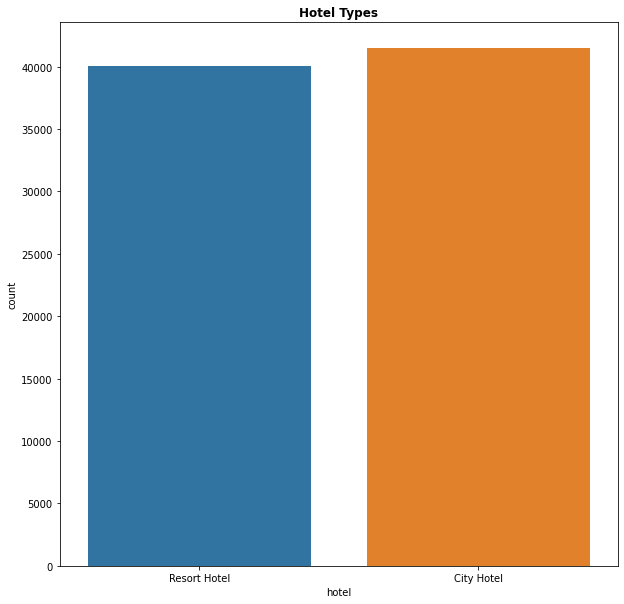

In [ ]:
# Hotel Types Visualization with seaborn counterplot
plt.figure(figsize=(10,10))
sns.countplot(x = 'hotel', data = df)
plt.title('Hotel Types', weight = 'bold')



In [ ]:
country_visit =( df[df['is_canceled']==0]['country'].value_counts()).to_frame()
country_visit.reset_index(level=0, inplace=True)
country_visit.rename(columns = {'index':'Country','country':'Count'},inplace=True)

country_visit

,Country,Count
0,PRT,13969
1,GBR,6283
2,ESP,4044
3,FRA,2576
4,IRL,1806
...,...,...
125,ZMB,1
126,COM,1
127,UGA,1
128,BDI,1


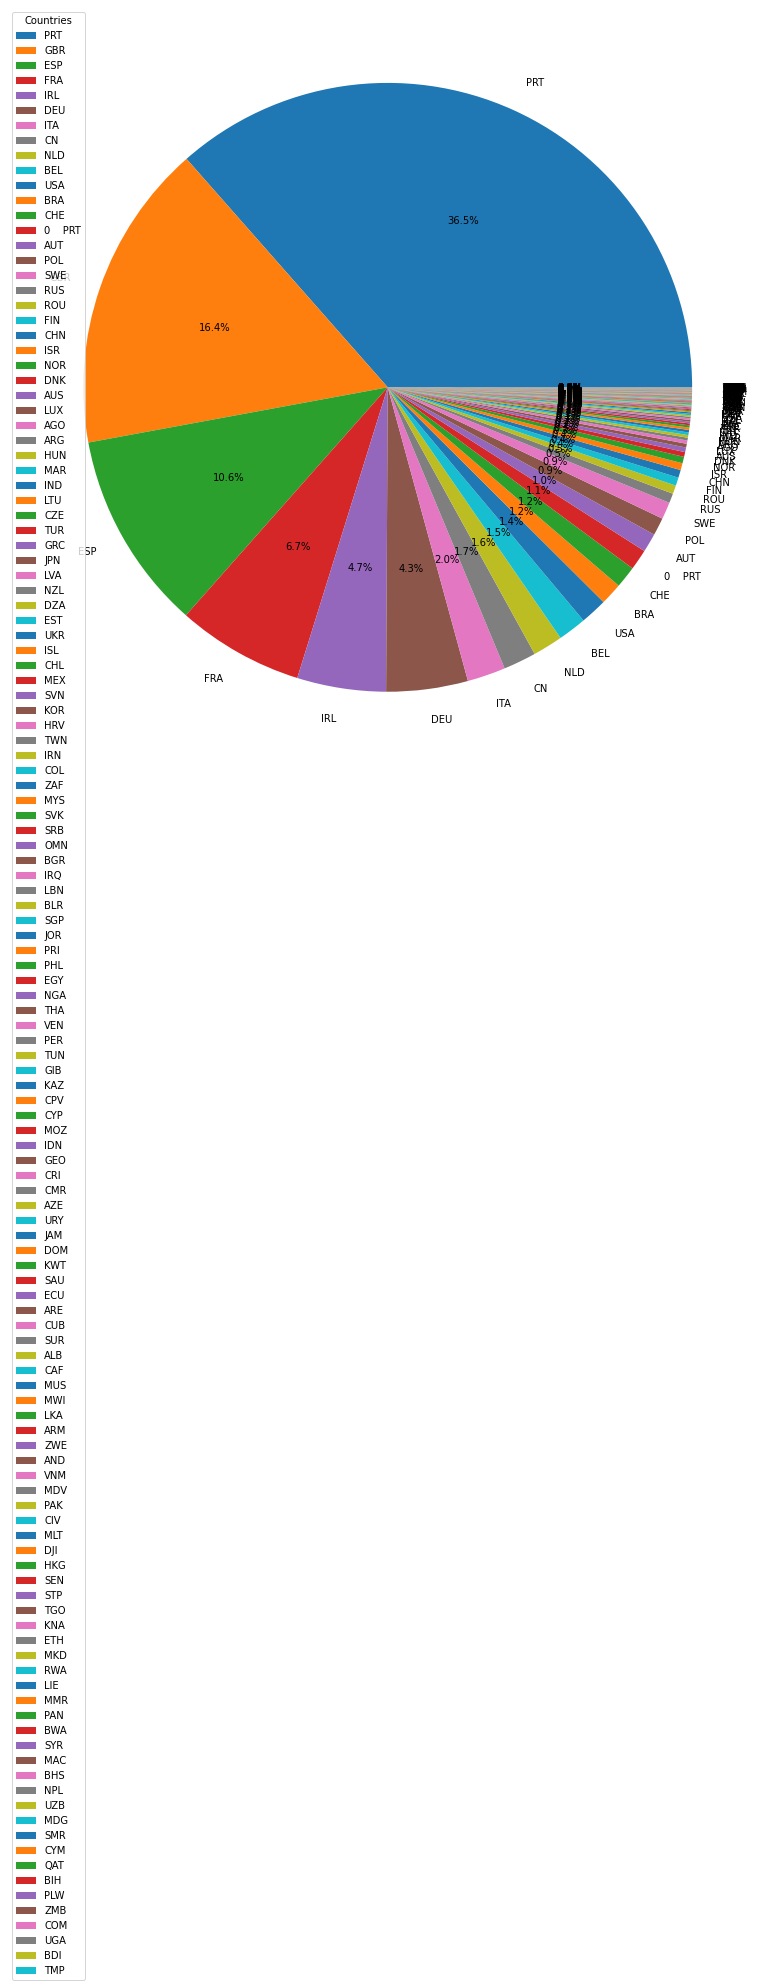

In [ ]:
#Creating pie chart on  where the most guests prefer
data = country_visit.Count
label = country_visit.Country
explode = (0.1,0,0)

fig = plt.figure(figsize=(20,14))
plt.pie(data,labels=label,autopct='%1.1f%%')
plt.legend(title = "Countries")
plt.show()




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hoten In Cancel Situation')

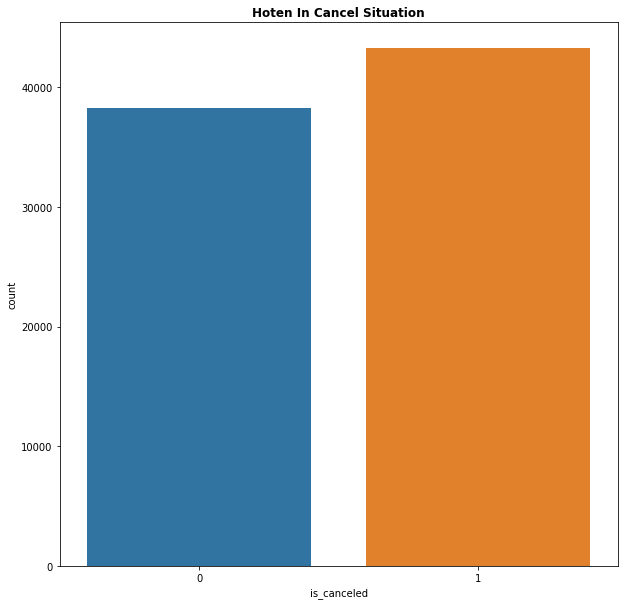

In [ ]:
# Hotel cancel in situation graph
x = df.is_canceled
y = df

plt.figure(figsize=(10,10))
sns.countplot(x,data = y)
plt.title('Hoten In Cancel Situation', weight='bold')


In [ ]:
# Ploting a linechart to evaluate how much have been paid for room per day in the year
resort_data_checked = df[(df['hotel']=='Resort Hotel')&(df['is_canceled']==0)]
city_data_checked =  df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)]

resort_hotel = resort_data_checked.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = city_data_checked.groupby(['arrival_date_month'])['adr'].mean().reset_index()

final_hotel = resort_hotel.merge(city_hotel, on= 'arrival_date_month')

final_hotel.sort_values('arrival_date_month')

,arrival_date_month,adr_x,adr_y
0,April,75.867816,81.020039
1,August,181.205892,82.281385
2,December,68.322236,74.877361
3,February,54.147478,70.388318
4,January,48.708919,74.378428
5,July,150.122528,73.701537
6,June,107.921869,78.944815
7,March,57.012487,74.654790
8,May,76.657558,95.576973
9,November,48.681640,71.437495


In [ ]:
#Sorting the month based on its order arrangment
from calendar import month_name
month_order = list(month_name)
final_hotel.index = pd.CategoricalIndex(final_hotel['arrival_date_month'], categories = month_order, ordered=True)
final_hotel = final_hotel.sort_index().reset_index(drop=True)

In [ ]:
final_hotel

,arrival_date_month,adr_x,adr_y
0,January,48.708919,74.378428
1,February,54.147478,70.388318
2,March,57.012487,74.654790
3,April,75.867816,81.020039
4,May,76.657558,95.576973
5,June,107.921869,78.944815
6,July,150.122528,73.701537
7,August,181.205892,82.281385
8,September,96.416860,102.624320
9,October,61.727505,91.767777


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


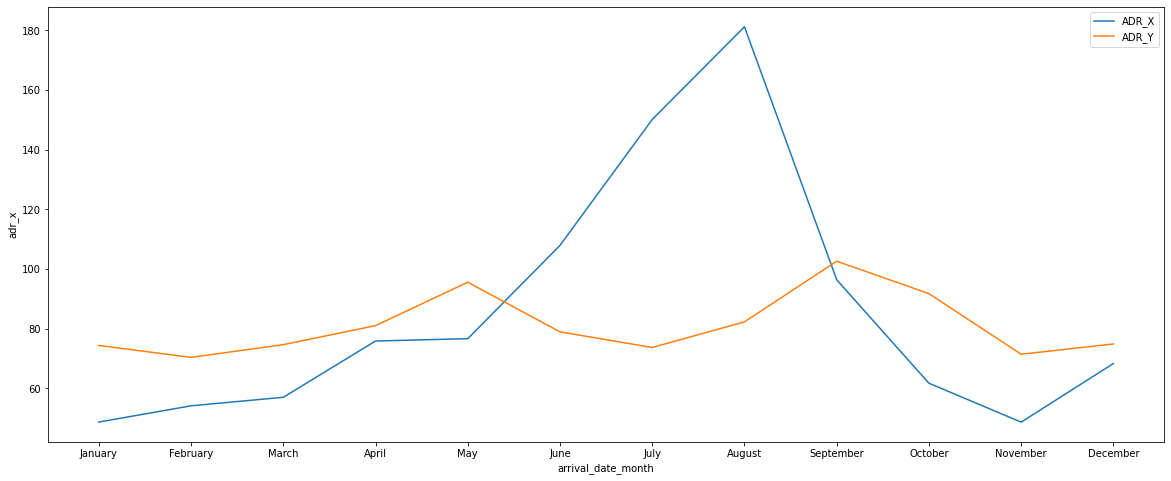

In [ ]:
# Ploting line chart on payment of room for every month
x = final_hotel.arrival_date_month
y = final_hotel.adr_x
z = final_hotel.adr_y
plt.figure(figsize=(20,8))
plt.xlabel = 'Month'
plt.ylabel = 'Price'
sns.lineplot(x,y, label = "ADR_X")
sns.lineplot(x,z, label = "ADR_Y")
plt.show()

In [ ]:
#Extractiong data which are not cancelled reservation
resort_data_checked = df[(df['hotel']=='Resort Hotel')&(df['is_canceled']==0)]
city_data_checked =   df[(df['hotel']=='City Hotel')&(df['is_canceled']==0)]

#Counting the number of rooms, which are booked in Resort Hotel
resort_guest_busy = resort_data_checked['arrival_date_month'].value_counts().to_frame()
resort_guest_busy.columns = ['Num_of_guest_resort']
resort_guest_busy.index.rename('Month', inplace=True)


#Counting the number of rooms , which are booked in City hotel
city_guest_busy =   city_data_checked['arrival_date_month'].value_counts().to_frame()
city_guest_busy.columns = ['Num_of_guest_city']
city_guest_busy.index.rename('Month', inplace=True)

#Merging the data set of city hotel and resort hotel which are booked
final_guest_busy = resort_guest_busy.merge(city_guest_busy,on='Month')


#Arranging the month based on its order
from calendar import month_name
month_order = list(month_name)

final_guest_busy.index = pd.CategoricalIndex(final_guest_busy.index, categories = month_order, ordered=True)
final_guest_busy = final_guest_busy.sort_index().reset_index(drop=False)



final_guest_busy

,Month,Num_of_guest_resort,Num_of_guest_city
0,January,1868,388
1,February,2308,220
2,March,2573,286
3,April,2550,256
4,May,2535,413
5,June,2038,108
6,July,3137,579
7,August,3257,1307
8,September,2102,2097
9,October,2577,2105


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


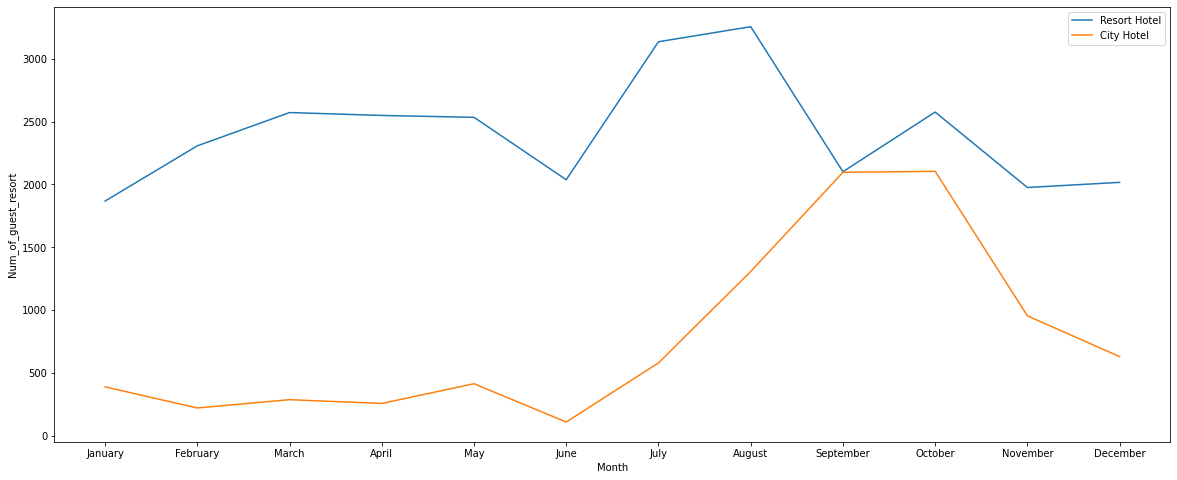

In [ ]:
#line chart ploting for understanding the traffic of busy in hotel reservation based on month
x = final_guest_busy.Month
y = final_guest_busy.Num_of_guest_resort
z = final_guest_busy.Num_of_guest_city

plt.figure(figsize=(20,8))
plt.xlabel = 'Month'
plt.ylabel = 'Value'
sns.lineplot(x,y, label = "Resort Hotel")
sns.lineplot(x,z, label = "City Hotel")
plt.show()

In [ ]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

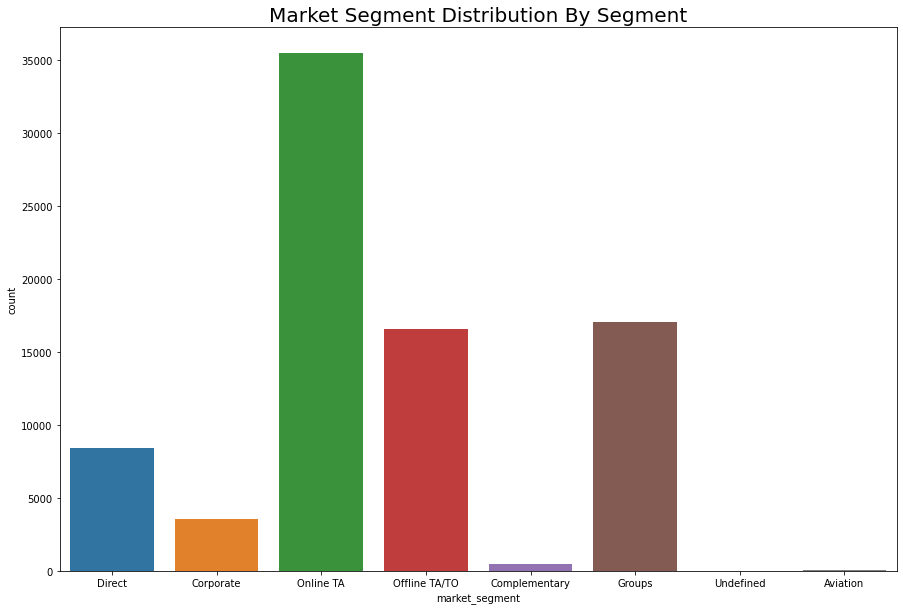

In [ ]:
#Graphical representation of market segment distribution on the basis of segnment
plt.figure(figsize=(15,10))
plt.title("Market Segment Distribution By Segment",fontsize=20)
sns.countplot(x = 'market_segment', data = df)

In [ ]:
#Calculating how long people stay in each hotel

non_cancelled = df['is_canceled']==0
data = df[non_cancelled]
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81527,City Hotel,0,8,2015,December,50,10,1,3,2,...,No Deposit,28,0,0,Transient,58.00,0,0,Check-Out,2015-12-14
81528,City Hotel,0,11,2015,December,50,11,1,2,2,...,No Deposit,28,0,0,Transient,58.00,0,0,Check-Out,2015-12-14
81529,City Hotel,0,11,2015,December,50,11,1,2,2,...,No Deposit,9,0,0,Contract,96.00,1,2,Check-Out,2015-12-14
81530,City Hotel,0,10,2015,December,50,11,1,2,2,...,No Deposit,28,0,0,Transient,58.00,0,0,Check-Out,2015-12-14


In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [ ]:
hotel_stay = data.groupby(['total_nights','hotel']).agg('count').reset_index()
hotel_stay = hotel_stay.iloc[:,:3]
hotel_stay = hotel_stay.rename(columns = {'is_canceled':'No_of_stays'})
hotel_stay

,total_nights,hotel,No_of_stays
0,0,City Hotel,48
1,0,Resort Hotel,372
2,1,City Hotel,1718
3,1,Resort Hotel,6580
4,2,City Hotel,2658
5,2,Resort Hotel,4488
6,3,City Hotel,2546
7,3,Resort Hotel,3830
8,4,City Hotel,1401
9,4,Resort Hotel,3321


In [ ]:
px.bar(data_frame = hotel_stay, x = 'total_nights',y = 'No_of_stays',barmode='group',template = 'plotly_dark')


<function matplotlib.pyplot.show>

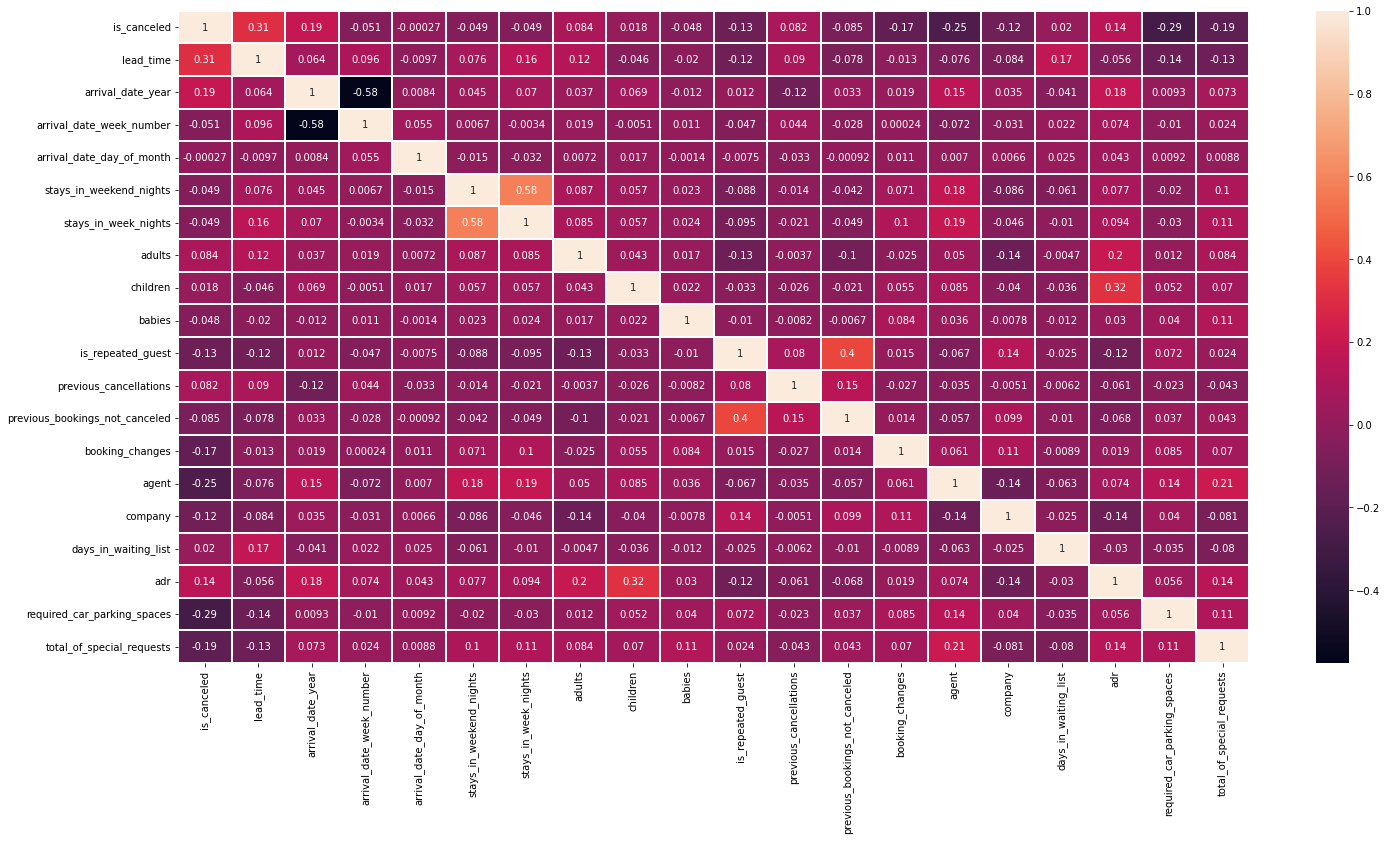

In [ ]:
#Plotting corelation between data by heatmap
plt.figure(figsize=(24,12))
corr = df.corr()
sns.heatmap(corr,annot=True,linewidths=1)
plt.show